In [2]:
import xgboost as xgb
import sys
import time

#sys.path.insert(0, '/home/wygos/sources/feature_importance/shap/build/lib.linux-x86_64-3.6/')
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lib.real_examples as real_examples
import lib.print
from tqdm import tqdm

%matplotlib inline
shap.initjs()

%load_ext autoreload
%autoreload 2

In [30]:
codes = {'f':'ban', 'g':'shap_orig_a', 'h':'shap_fast', 'o':'shap_orig'}

In [ ]:
%%time
#first run binary to compute values
times = {'ban':[], 'shap orig a':[], 'shap fast':[], 'shap orig':[]}

!cd .. && make
depth_range = [1,5,10,15,20,22,25,27,28]
for i in tqdm(depth_range):
    for option in ['f', 'g', 'h', 'o']:
        start = time.time()
        !time ../build/shap_banzhaf_symmetric {option} {i}
        end = time.time()
        times[codes[option]].append(end-start)


make: *** No targets specified and no makefile found.  Stop.


  0%|          | 0/9 [00:00<?, ?it/s]

tree computed 3
data computed 1
banzhaf_fast: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5352maxresident)k
0inputs+8outputs (0major+258minor)pagefaults 0swaps
tree computed 3
data computed 1
shap_simple: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5060maxresident)k
0inputs+8outputs (0major+256minor)pagefaults 0swaps
tree computed 3
data computed 1
shap_fast: 
0.00user 0.00system 0:00.02elapsed 13%CPU (0avgtext+0avgdata 5216maxresident)k
8inputs+8outputs (0major+256minor)pagefaults 0swaps
tree computed 3
data computed 1
shap_orig_c: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5084maxresident)k
0inputs+8outputs (0major+255minor)pagefaults 0swaps


 11%|█         | 1/9 [00:00<00:04,  1.82it/s]

tree computed 63
data computed 1
banzhaf_fast: 
0.00user 0.00system 0:00.02elapsed 11%CPU (0avgtext+0avgdata 5064maxresident)k
8inputs+8outputs (0major+258minor)pagefaults 0swaps
tree computed 63
data computed 1
shap_simple: 
0.00user 0.00system 0:00.00elapsed 75%CPU (0avgtext+0avgdata 5216maxresident)k
8inputs+8outputs (0major+256minor)pagefaults 0swaps
tree computed 63
data computed 1
shap_fast: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5368maxresident)k
0inputs+8outputs (0major+262minor)pagefaults 0swaps
tree computed 63
data computed 1
shap_orig_c: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5256maxresident)k
0inputs+8outputs (0major+259minor)pagefaults 0swaps


 22%|██▏       | 2/9 [00:01<00:03,  1.82it/s]

tree computed 2047
data computed 1
banzhaf_fast: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5204maxresident)k
8inputs+8outputs (0major+296minor)pagefaults 0swaps
tree computed 2047
data computed 1
shap_simple: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5172maxresident)k
0inputs+8outputs (0major+286minor)pagefaults 0swaps
tree computed 2047
data computed 1
shap_fast: 
0.00user 0.00system 0:00.00elapsed 100%CPU (0avgtext+0avgdata 5896maxresident)k
0inputs+8outputs (0major+416minor)pagefaults 0swaps
tree computed 2047
data computed 1
shap_orig_c: 
0.00user 0.00system 0:00.00elapsed 80%CPU (0avgtext+0avgdata 5288maxresident)k
0inputs+8outputs (0major+314minor)pagefaults 0swaps


 33%|███▎      | 3/9 [00:01<00:03,  1.83it/s]

tree computed 65535
data computed 1
banzhaf_fast: 
0.01user 0.00system 0:00.02elapsed 100%CPU (0avgtext+0avgdata 9724maxresident)k
0inputs+8outputs (0major+1540minor)pagefaults 0swaps
tree computed 65535
data computed 1
shap_simple: 
0.04user 0.00system 0:00.05elapsed 100%CPU (0avgtext+0avgdata 9160maxresident)k
0inputs+8outputs (0major+1279minor)pagefaults 0swaps
tree computed 65535
data computed 1
shap_fast: 
0.04user 0.02system 0:00.06elapsed 100%CPU (0avgtext+0avgdata 31276maxresident)k
0inputs+8outputs (0major+6913minor)pagefaults 0swaps
tree computed 65535
data computed 1
shap_orig_c: 
0.05user 0.00system 0:00.06elapsed 100%CPU (0avgtext+0avgdata 12136maxresident)k
0inputs+8outputs (0major+2066minor)pagefaults 0swaps


 44%|████▍     | 4/9 [00:02<00:02,  1.68it/s]

tree computed 2097151
data computed 1
banzhaf_fast: 
0.38user 0.09system 0:00.48elapsed 99%CPU (0avgtext+0avgdata 168532maxresident)k
0inputs+8outputs (0major+41219minor)pagefaults 0swaps
tree computed 2097151
data computed 1
shap_simple: 
1.99user 0.06system 0:02.10elapsed 97%CPU (0avgtext+0avgdata 136160maxresident)k
0inputs+8outputs (0major+33025minor)pagefaults 0swaps
tree computed 2097151
data computed 1
shap_fast: 
1.50user 0.44system 0:01.95elapsed 100%CPU (0avgtext+0avgdata 987692maxresident)k
0inputs+8outputs (0major+246017minor)pagefaults 0swaps
tree computed 2097151
data computed 1
shap_orig_c: 
2.16user 0.11system 0:02.27elapsed 99%CPU (0avgtext+0avgdata 234796maxresident)k
0inputs+8outputs (0major+57909minor)pagefaults 0swaps


 56%|█████▌    | 5/9 [00:09<00:10,  2.62s/it]

tree computed 8388607
data computed 1
banzhaf_fast: 
1.49user 0.28system 0:01.77elapsed 99%CPU (0avgtext+0avgdata 660156maxresident)k
0inputs+8outputs (0major+164099minor)pagefaults 0swaps
tree computed 8388607
data computed 1
shap_simple: 
10.01user 0.19system 0:10.21elapsed 99%CPU (0avgtext+0avgdata 529356maxresident)k
0inputs+8outputs (0major+131328minor)pagefaults 0swaps
tree computed 8388607
data computed 1
shap_fast: 
6.48user 1.75system 0:08.23elapsed 100%CPU (0avgtext+0avgdata 4198912maxresident)k
0inputs+8outputs (0major+1048831minor)pagefaults 0swaps
tree computed 8388607
data computed 1
shap_orig_c: 
9.56user 0.37system 0:09.93elapsed 100%CPU (0avgtext+0avgdata 925388maxresident)k
0inputs+8outputs (0major+230921minor)pagefaults 0swaps


 67%|██████▋   | 6/9 [00:40<00:33, 11.04s/it]

tree computed 67108863
data computed 1
banzhaf_fast: 
12.24user 2.16system 0:14.41elapsed 99%CPU (0avgtext+0avgdata 5247500maxresident)k
0inputs+8outputs (0major+1310981minor)pagefaults 0swaps
tree computed 67108863
data computed 1
shap_simple: 
90.22user 4.33system 1:34.56elapsed 99%CPU (0avgtext+0avgdata 4199424maxresident)k
0inputs+8outputs (0major+1916697minor)pagefaults 0swaps
tree computed 67108863
data computed 1
shap_fast: 
55.74user 18.23system 1:13.97elapsed 99%CPU (0avgtext+0avgdata 37753308maxresident)k
0inputs+8outputs (0major+10456039minor)pagefaults 0swaps
tree computed 67108863
data computed 1
shap_orig_c: 
101.17user 4.18system 1:45.36elapsed 99%CPU (0avgtext+0avgdata 7370992maxresident)k
0inputs+8outputs (0major+2053692minor)pagefaults 0swaps


 78%|███████▊  | 7/9 [05:29<03:08, 94.38s/it]

tree computed 268435455
data computed 1
banzhaf_fast: 
46.93user 16.90system 1:03.86elapsed 99%CPU (0avgtext+0avgdata 20975968maxresident)k
0inputs+8outputs (0major+8209564minor)pagefaults 0swaps
tree computed 268435455
data computed 1
shap_simple: 
418.56user 19.51system 7:18.08elapsed 99%CPU (0avgtext+0avgdata 16782312maxresident)k
0inputs+8outputs (0major+13453365minor)pagefaults 0swaps
tree computed 268435455
data computed 1
shap_fast: 
251.21user 135.97system 6:27.28elapsed 99%CPU (0avgtext+0avgdata 159388132maxresident)k
0inputs+8outputs (0major+97049129minor)pagefaults 0swaps
tree computed 268435455
data computed 1


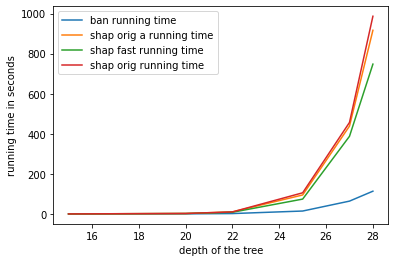

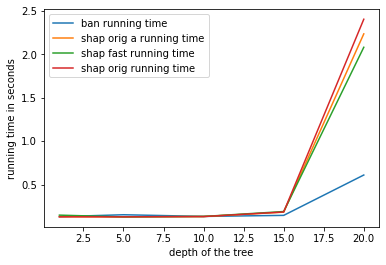

In [31]:
for k, v in times.items():
    plt.plot(depth_range[3:], v[3:], label=f'{k} running time')

#plt.yscale('log')
#depth_range
#["tree depth", "$\ell_2$ error"]
plt.xlabel('depth of the tree')
plt.ylabel('running time in seconds')
plt.legend()
plt.savefig('shapley_running_times.png')
plt.show()

for k, v in times.items():
    plt.plot(depth_range[:5], v[:5], label=f'{k} running time')

#plt.yscale('log')
#depth_range
#["tree depth", "$\ell_2$ error"]
plt.xlabel('depth of the tree')
plt.ylabel('running time in seconds')
plt.legend()
#plt.savefig('shapley_running_times.png')
plt.show()

In [ ]:
%%time
#first run binary to compute values


times_medium = {}
!cd .. && make
for option in ['f', 'g', 'h', 'o']:
    #for NAME in ['boston', 'health_insurance', 'flights', 'nhanes']:
    #for NAME in ['boston','nhanes_100', 'health_insurance_100']:
    for NAME in ['flights_dt_100']:
        DATA_PATH=f'../data/{NAME}/'
        DATA_NAME=f'{DATA_PATH}/{NAME}.csv'
        BST_NAME=f'{DATA_PATH}/bst_{NAME}.file'
        start = time.time()

        h = 100000
        !head -{h} {DATA_NAME} > {DATA_NAME}.{h}
        !echo  {option} {BST_NAME} {DATA_NAME}.{h}
        !time ../build/shap_banzhaf {option} {BST_NAME} {DATA_NAME}.{h}
        end = time.time()
        times_medium[codes[option] + "_" + NAME] = end - start
    

make: *** No targets specified and no makefile found.  Stop.
f ../data/flights_dt_100//bst_flights_dt_100.file ../data/flights_dt_100//flights_dt_100.csv.100000
90data read
banzhaf_fast: 
866.41user 0.57system 14:27.83elapsed 99%CPU (0avgtext+0avgdata 241028maxresident)k
24inputs+143960outputs (0major+108775minor)pagefaults 0swaps
g ../data/flights_dt_100//bst_flights_dt_100.file ../data/flights_dt_100//flights_dt_100.csv.100000
90data read


In [35]:
print("&".join(codes[option] for option in ['f', 'g', 'h', 'o']))
    
#for NAME in ['boston', 'health_insurance', , 'flights', 'nhanes']:
#for NAME in ['boston', 'nhanes_100', 'health_insurance_100']:
for NAME in ['flights_dt_100']:
    s = NAME
    print('\hline')
    for option in ['f', 'g', 'h', 'o']:
        v = times_medium[codes[option] + "_" + NAME]
        d = int(v// (3600*24))
        v -= d * 24 * 3600
        h = int(v// 3600)
        v -= h*3600
        m = int(v // 60)
        v -= m * 60
        s += " & "

        
        s += f' {d} d' if d > 0 else ""

        s += f' {h} h' if h > 0 else ""
        s += f' {m} m' if m > 0 else ""
        if h == 0:
            if m > 0:
                s += f' {v:.0f} s'
            else: 
                s += f' {v:.2f} s'
                

    s += " \\\\"
    print(s)

ban&shap_orig_a&shap_fast&shap_orig
\hline
flights_dt_100 &  14 m 28 s &  5 h 40 m &  5 h 23 m &  5 h 9 m \\


In [ ]:

ban&shap ours&shap fast&shap orig
\hline
boston &  0.41 s &  0.42 s &  0.42 s &  0.41 s \\
\hline
nhanes &  3.57 s &  45.58 s &  34.92 s &  42.87 s \\
\hline
health_insurance &  4 m 55 s &  35 m 3 s &  23 m 18 s &  30 m 55 s \\
